In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

In [2]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

In [3]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option("display.max_columns", None)

In [4]:
pd.options.mode.chained_assignment = None  # default='warn'

In [40]:
sns.set(rc={'figure.figsize':(16,12)})

In [5]:
data = pd.read_csv('cleaned_taxi_data.csv')

In [6]:
data = data.drop(['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'fare_amount','extra','mta_tax',
                 'tip_amount','tolls_amount','improvement_surcharge','payment_type','tmin','tmax',
                 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'date'], axis=1)

In [30]:
sample = data.iloc[:100000]

In [31]:
sample.shape

(100000, 13)

### Train and Test data split

In [32]:
X = sample.drop('trip_duration_seconds', axis=1).values
y = sample['trip_duration_seconds'].values

In [33]:
print(X.shape)
print(y.shape)

(100000, 12)
(100000,)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train=np.asarray(X_train).astype(np.int)

y_train=np.asarray(y_train).astype(np.int)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 12)
(20000, 12)
(80000,)
(20000,)


### Linear Regression

In [37]:
learning_rates = [1E-0, 1E-1,1E-2, 1E-3, 1E-4, 1E-5]

In [38]:
def fit_lrm(X_train, y_train, X_test, y_test, lrate, loss, optmzr):
    
    # Step 1: define model
    model = Sequential()
    model.add(Dense(20, input_dim=12, activation='relu', name='layer1'))
    model.add(Dense(1, activation='relu', name='layer2'))
    
    # Step 2: compile model
    opt = SGD(learning_rate=lrate)
    model.compile(loss=loss, optimizer=optmzr, metrics=['accuracy'])
    model.summary()
    
    # Step 3: fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)
   
    # Setp 4: plot learning curves
    pyplot.plot(history.history['accuracy'], label='train')
    pyplot.plot(history.history['val_accuracy'], label='test')
    pyplot.title('lrate='+str(lrate), pad=-50)

#### Loss = 'mean_squared_error' | optimizer = SGD

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 20)                260       
_________________________________________________________________
layer2 (Dense)               (None, 1)                 21        
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 20)                260       
_________________________________________________________________
layer2 (Dense)               (None, 1)                 21        
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_39"
___________

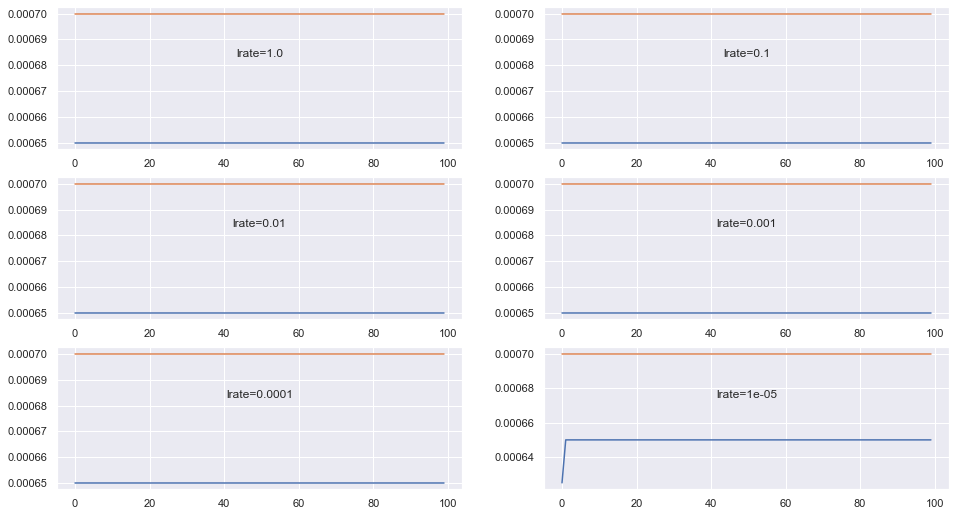

In [41]:
for i in range(len(learning_rates)):
    opt = SGD(learning_rate=learning_rates[i])
    
    # determine the plot number
    plot_no = 420 + (i+1)
    pyplot.subplot(plot_no)
    
    # fit the model
    loss = 'mean_squared_error'
    fit_lrm(X_train, y_train, X_test, y_test, learning_rates[i], loss, opt)

pyplot.show()

#### Linear regression: Loss = 'mean_absolute_error' | optimizer = SGD

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 20)                260       
_________________________________________________________________
layer2 (Dense)               (None, 1)                 21        
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 20)                260       
_________________________________________________________________
layer2 (Dense)               (None, 1)                 21        
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_8"
______________

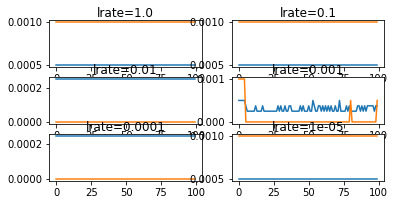

In [23]:
for i in range(len(learning_rates)):
    opt = SGD(learning_rate=learning_rates[i])
    
    # determine the plot number
    plot_no = 420 + (i+1)
    pyplot.subplot(plot_no)
    
    # fit the model
    loss = 'mean_absolute_error'
    fit_lrm(X_train, y_train, X_test, y_test, learning_rates[i], loss, opt)

pyplot.show()

#### Linear regression: Loss = 'mean_squared_error' | optimizer = Adam

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 20)                260       
_________________________________________________________________
layer2 (Dense)               (None, 1)                 21        
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 20)                260       
_________________________________________________________________
layer2 (Dense)               (None, 1)                 21        
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_14"
___________

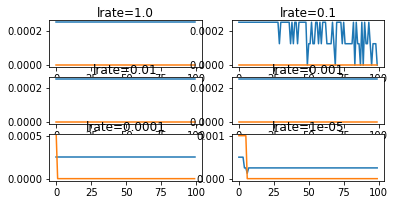

In [24]:
for i in range(len(learning_rates)):
    opt = Adam(learning_rate=learning_rates[i])
    
    # determine the plot number
    plot_no = 420 + (i+1)
    pyplot.subplot(plot_no)
    
    # fit the model
    loss = 'mean_squared_error'
    fit_lrm(X_train, y_train, X_test, y_test, learning_rates[i], loss, opt)

pyplot.show()

#### Linear regression: Loss = 'mean_absolute_error' | optimizer = Adam

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 20)                260       
_________________________________________________________________
layer2 (Dense)               (None, 1)                 21        
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 20)                260       
_________________________________________________________________
layer2 (Dense)               (None, 1)                 21        
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_20"
___________

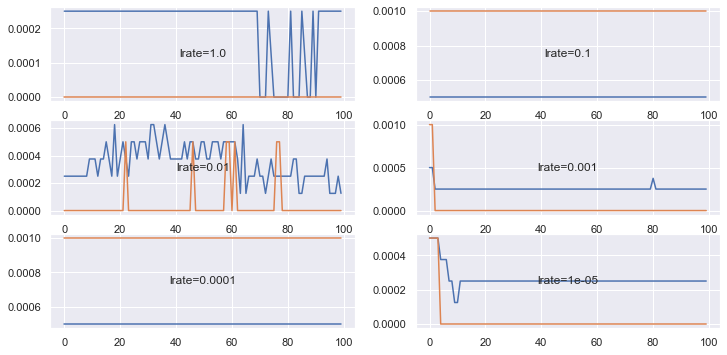

In [26]:
for i in range(len(learning_rates)):
    opt = Adam(learning_rate=learning_rates[i])
    
    # determine the plot number
    plot_no = 420 + (i+1)
    pyplot.subplot(plot_no)
    
    # fit the model
    loss = 'mean_absolute_error'
    fit_lrm(X_train, y_train, X_test, y_test, learning_rates[i], loss, opt)

pyplot.show()

#### Linear regression: Loss = 'mean_squared_error' | optimizer = RMSprop

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 20)                260       
_________________________________________________________________
layer2 (Dense)               (None, 1)                 21        
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 20)                260       
_________________________________________________________________
layer2 (Dense)               (None, 1)                 21        
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_26"
___________

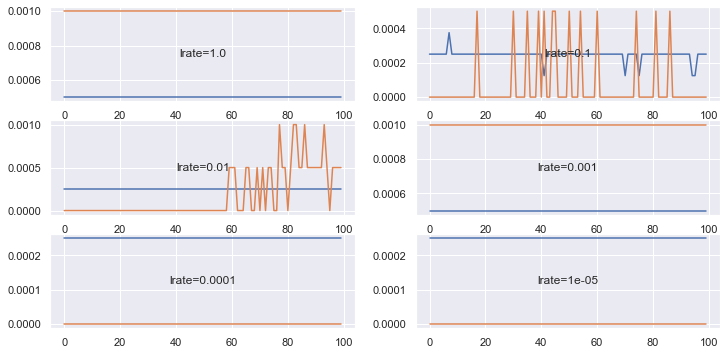

In [27]:
for i in range(len(learning_rates)):
    opt = RMSprop(learning_rate=learning_rates[i])
    
    # determine the plot number
    plot_no = 420 + (i+1)
    pyplot.subplot(plot_no)
    
    # fit the model
    loss = 'mean_squared_error'
    fit_lrm(X_train, y_train, X_test, y_test, learning_rates[i], loss, opt)

pyplot.show()

#### Linear regression: Loss = 'mean_absolute_error' | optimizer = RMSprop

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 20)                260       
_________________________________________________________________
layer2 (Dense)               (None, 1)                 21        
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 20)                260       
_________________________________________________________________
layer2 (Dense)               (None, 1)                 21        
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_32"
___________

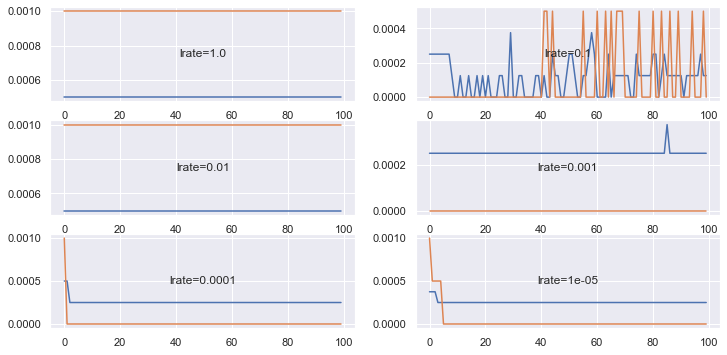

In [28]:
for i in range(len(learning_rates)):
    opt = RMSprop(learning_rate=learning_rates[i])
    
    # determine the plot number
    plot_no = 420 + (i+1)
    pyplot.subplot(plot_no)
    
    # fit the model
    loss = 'mean_absolute_error'
    fit_lrm(X_train, y_train, X_test, y_test, learning_rates[i], loss, opt)

pyplot.show()